In [1]:
import requests
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
r = requests.get('https://api.stackexchange.com/2.2/tags?order=desc&sort=popular&site=datascience')
r.status_code

200

In [4]:
r.headers['content-type']

'application/json; charset=utf-8'

In [5]:
r.encoding

'utf-8'

In [6]:
r.text

'{"items":[{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":2806,"name":"machine-learning"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":1234,"name":"python"},{"has_synonyms":true,"is_moderator_only":false,"is_required":false,"count":1131,"name":"neural-network"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":864,"name":"deep-learning"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":850,"name":"classification"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":706,"name":"r"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":611,"name":"data-mining"},{"has_synonyms":true,"is_moderator_only":false,"is_required":false,"count":495,"name":"scikit-learn"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":475,"name":"nlp"},{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":435

In [7]:
ds_df = pd.DataFrame(r.json()["items"])

In [8]:
ds_df

,count,has_synonyms,is_moderator_only,is_required,name
0,2806,False,False,False,machine-learning
1,1234,False,False,False,python
2,1131,True,False,False,neural-network
3,864,False,False,False,deep-learning
4,850,False,False,False,classification
5,706,False,False,False,r
6,611,False,False,False,data-mining
7,495,True,False,False,scikit-learn
8,475,False,False,False,nlp
9,435,False,False,False,clustering


In [61]:
pairs = []
for index, row in ds_df.iterrows():
    print(row["name"],index)
    r = requests.get('https://api.stackexchange.com/2.2/tags/' + row["name"] + '/related?site=datascience')
    r.status_code
    relatedtags_df = pd.DataFrame(r.json()["items"])
    top_rt_df = relatedtags_df.head(n=5).tail(n=4)
    for index2, row2, in top_rt_df.iterrows():
        pairs.append(tuple(sorted([row["name"],row2["name"]])))
    if (index == 10):
        break

machine-learning 0
python 1
neural-network 2
deep-learning 3
classification 4
r 5
data-mining 6
scikit-learn 7
nlp 8
clustering 9
predictive-modeling 10


In [62]:
pairs

[('machine-learning', 'neural-network'),
 ('classification', 'machine-learning'),
 ('deep-learning', 'machine-learning'),
 ('machine-learning', 'python'),
 ('machine-learning', 'python'),
 ('python', 'scikit-learn'),
 ('pandas', 'python'),
 ('neural-network', 'python'),
 ('machine-learning', 'neural-network'),
 ('deep-learning', 'neural-network'),
 ('keras', 'neural-network'),
 ('neural-network', 'python'),
 ('deep-learning', 'machine-learning'),
 ('deep-learning', 'neural-network'),
 ('deep-learning', 'keras'),
 ('deep-learning', 'tensorflow'),
 ('classification', 'machine-learning'),
 ('classification', 'python'),
 ('classification', 'neural-network'),
 ('classification', 'data-mining'),
 ('machine-learning', 'r'),
 ('python', 'r'),
 ('predictive-modeling', 'r'),
 ('data-mining', 'r'),
 ('data-mining', 'machine-learning'),
 ('classification', 'data-mining'),
 ('data-mining', 'dataset'),
 ('clustering', 'data-mining'),
 ('python', 'scikit-learn'),
 ('machine-learning', 'scikit-learn')

In [63]:
from collections import Counter
res = dict(Counter(pairs))
freq = pd.Series(res, name='Frequency')

In [64]:
freq

classification       data-mining            2
                     machine-learning       2
                     neural-network         1
                     python                 1
                     scikit-learn           1
clustering           data-mining            2
                     k-means                1
                     machine-learning       1
                     python                 1
data-mining          dataset                1
                     machine-learning       1
                     predictive-modeling    1
                     r                      1
deep-learning        keras                  1
                     machine-learning       2
                     neural-network         2
                     nlp                    1
                     tensorflow             1
keras                neural-network         1
machine-learning     neural-network         2
                     nlp                    1
                     predictive-mo

In [65]:
import networkx as nx

In [66]:
%matplotlib inline

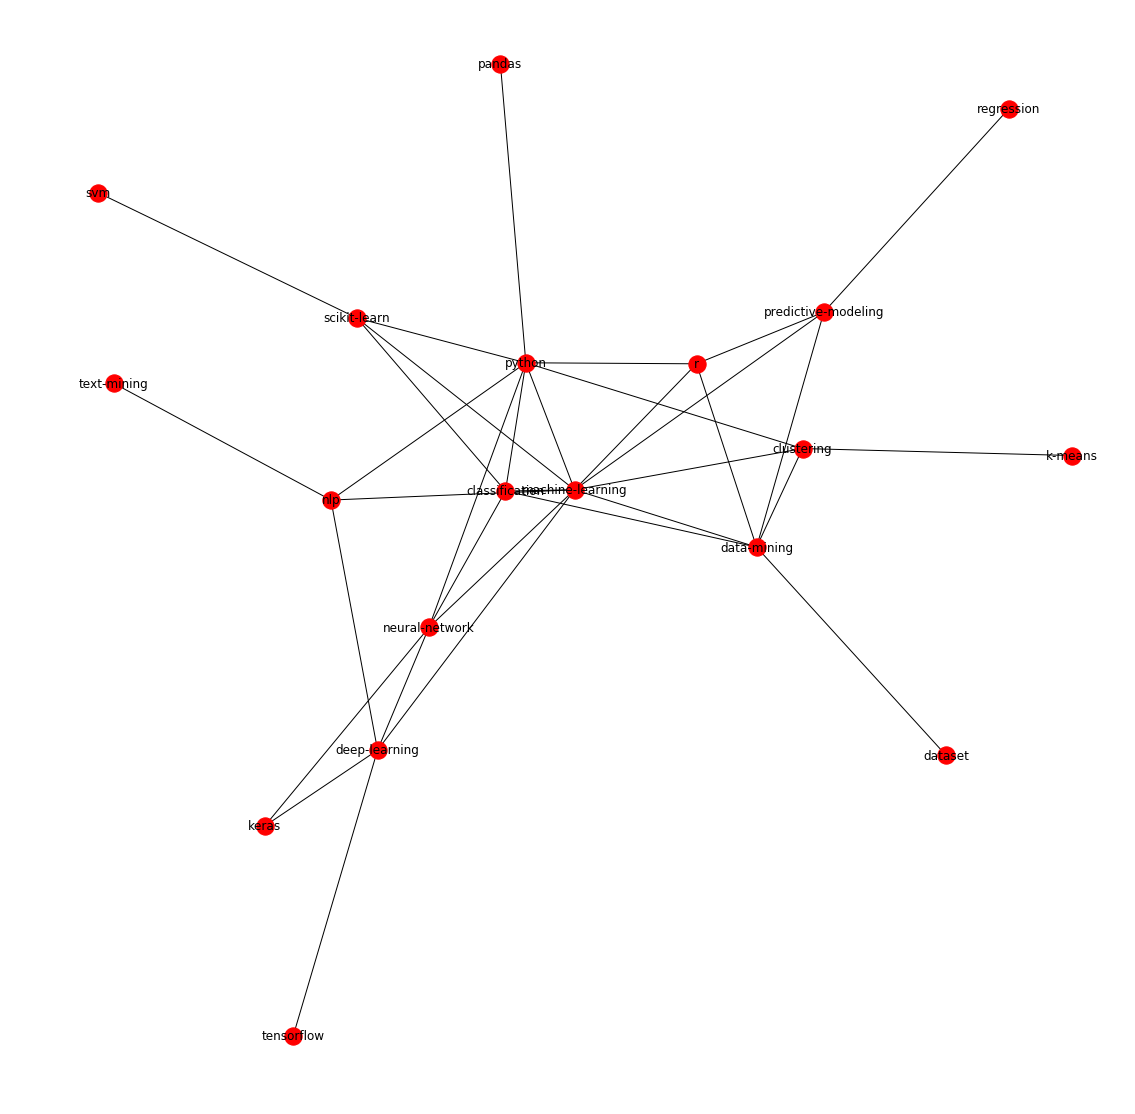

In [67]:
G = nx.Graph()
G.add_edges_from(pairs)
plt.figure(3,figsize=(15,15)) 
nx.draw(G,with_labels=True)
plt.show()

In [68]:
G.number_of_nodes()

19

In [69]:
import operator

In [70]:
sorted_x = sorted(dict(nx.degree(G)).items(), key=operator.itemgetter(1)) 

In [71]:
sorted_x

[('pandas', 1),
 ('tensorflow', 1),
 ('dataset', 1),
 ('regression', 1),
 ('k-means', 1),
 ('text-mining', 1),
 ('svm', 1),
 ('keras', 2),
 ('scikit-learn', 4),
 ('r', 4),
 ('nlp', 4),
 ('predictive-modeling', 4),
 ('clustering', 4),
 ('deep-learning', 5),
 ('classification', 5),
 ('neural-network', 5),
 ('data-mining', 6),
 ('python', 8),
 ('machine-learning', 10)]